<a href="https://colab.research.google.com/github/JavadMokhtari/Train-GAN/blob/main/Visualize_Feature_Maps_in_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

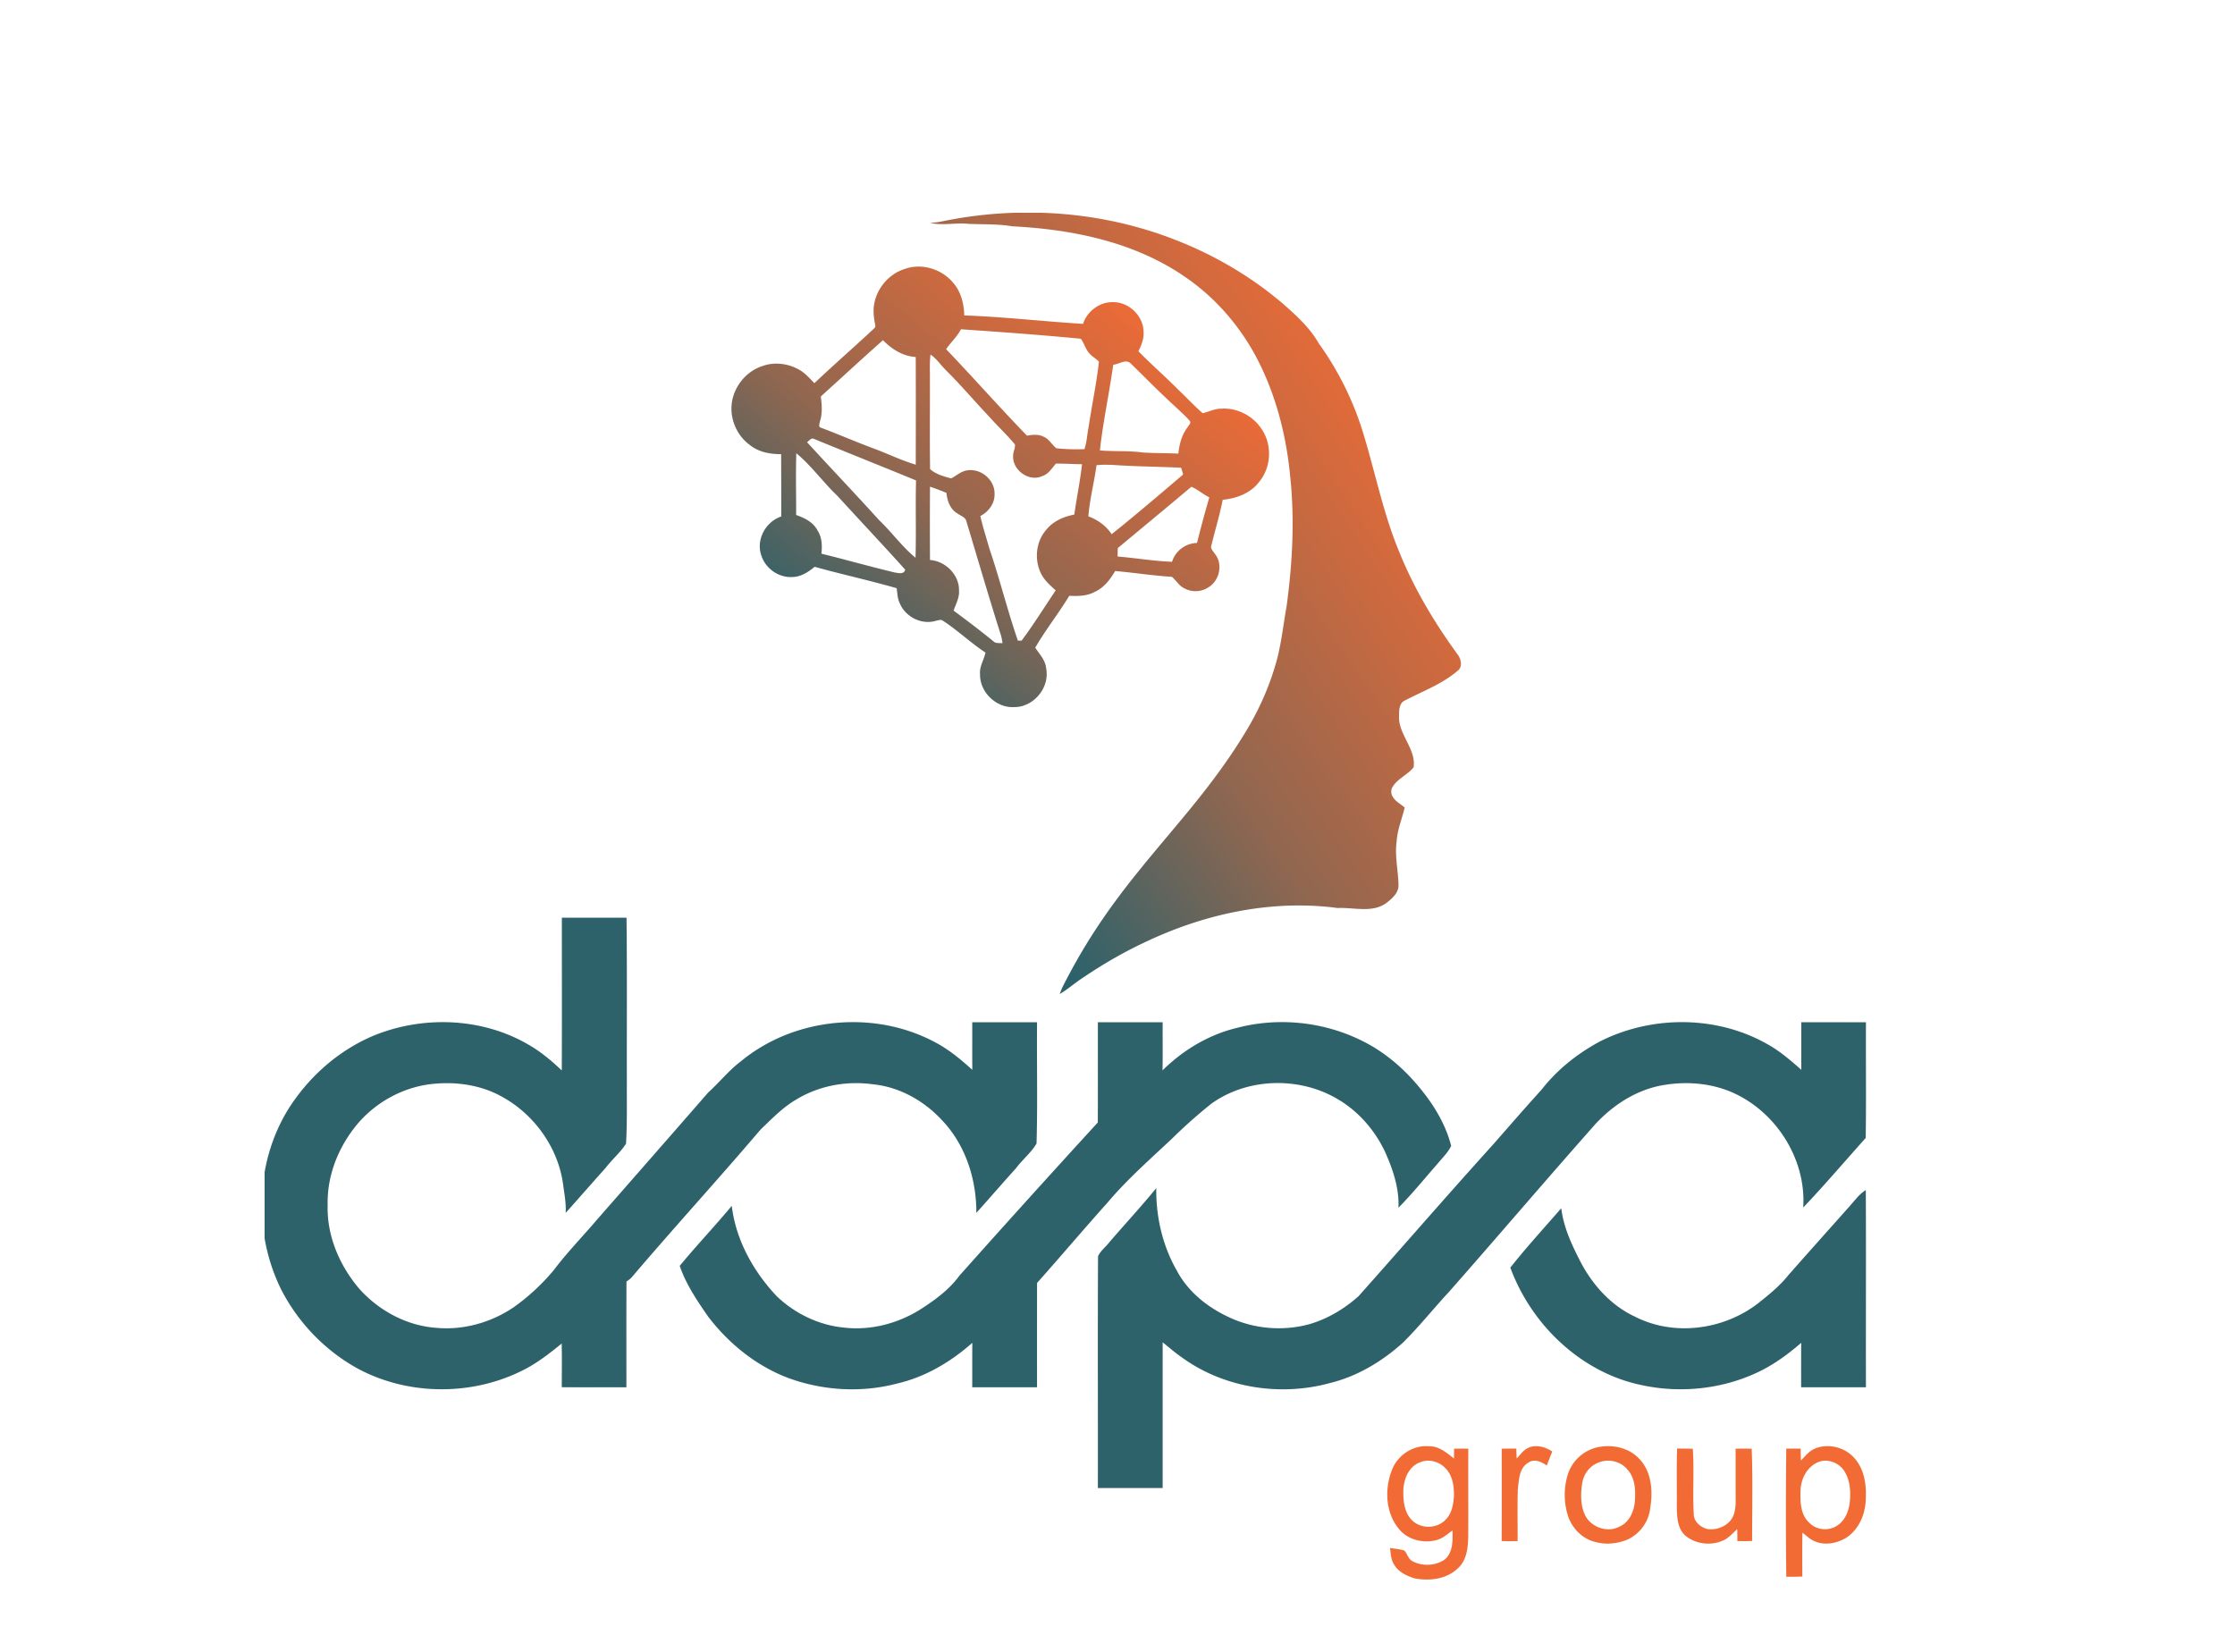
# <h1><center>Visualize Filters and Feature Maps in Convolutional Neural Networks</center></h1>

In [48]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from keras.applications.densenet import DenseNet121
from matplotlib import pyplot

In [37]:
# Load DenseNet model and show its properties
model = DenseNet121()
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_6[0][0]']       
                                )                                                       

## Visualize Filters

In [44]:
# Display convolutional filters and shape of their output
print('\nLayer Name', '\t\t Filter Shape', '\t\t Output Shape')
cnn_layers = []
for layer in model.layers:
    if '_2_conv' in layer.name:
        cnn_layers.append(layer)
        filters = layer.get_weights()[0]
        print(layer.name, '\t', filters.shape, '\t', layer.output_shape)


Layer Name 		 Filter Shape 		 Output Shape
conv2_block1_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block2_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block3_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block4_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block5_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block6_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv3_block1_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block2_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block3_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block4_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block5_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block6_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block7_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block8_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block9_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block10_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block

In [58]:
# Get the filters of first convolutional layer
filters = cnn_layers[0].get_weights()[0]

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

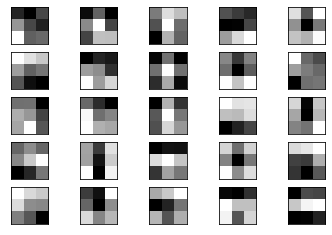

In [59]:
# plot first few filters
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(5):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

## Visualize Feature Maps